### Simple Linear Regression model Basic codes

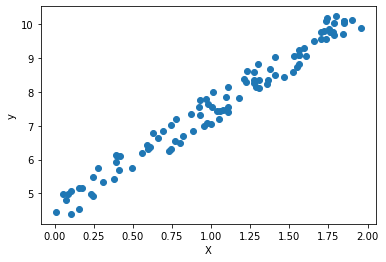

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [2]:
## Calculate theta using the Normal equation

X_b = np.c_[np.ones((100,1)),X] ## add x_theta = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.55797196],
       [2.93504185]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0=1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.55797196],
       [10.42805566]])

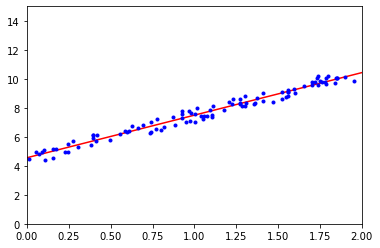

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
### Code using scikit-learn for linear regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.55797196]), array([[2.93504185]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.55797196],
       [10.42805566]])

### Gradient Descent

In [7]:
## Batch GD

eta = 0.1 #learning rate
n_interations = 1000
m = 100

theta = np.random.rand(2,1) ## random intialization

for interation in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

    
theta

array([[4.55797196],
       [2.93504185]])

In [8]:
## Stochastic GD

n_epochs = 50
t0, t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
        
theta

array([[4.55447521],
       [2.92386451]])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_ 

(array([4.51541631]), array([2.95429959]))

### Polynomial reggeression

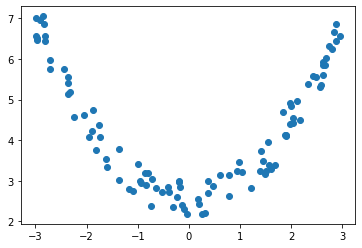

In [10]:
m = 100
X1 = 6*np.random.rand(m,1) - 3
y1 = 0.5*X1**2 + 2 + np.random.rand(m,1)

plt.scatter(X1,y1)

In [11]:
## fitting non-linear regression line

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X1)
print(X1[0])

print(X_poly[0])

[0.78914322]
[0.78914322 0.62274702]


In [12]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y1)
poly_reg.intercept_, lin_reg.coef_

(array([2.54912534]), array([[2.93504185]]))

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.ylim(0,3)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

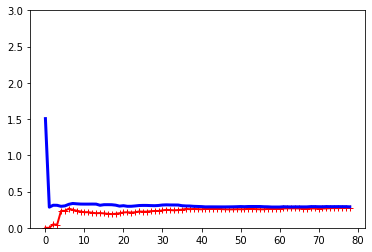

In [14]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

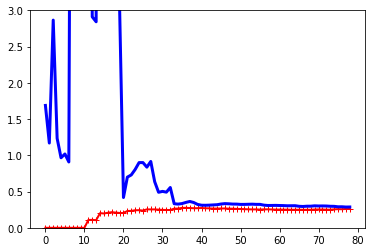

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        {"poly_features", PolynomialFeatures(degree=10, include_bias=False)},
        ("sgd_reg",LinearRegression())
))

plot_learning_curves(polynomial_regression,X,y)

### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.91798947]])

In [17]:
sdg_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.95395113])

### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.81074777])

### Elastic Net

In [19]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(X,y)
elastic_reg.predict([[1.5]])

array([8.70791846])

### Early stopping

In [20]:
m = 100
X1 = 6*np.random.rand(m,1) - 3
y = 0.5*X1**2 + 2 + np.random.rand(m,1)

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly_scaled = poly_features.fit_transform(X_train)
X_val_poly_scaled = poly_features.fit_transform(X_val)

In [21]:
/*
from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, warm_start=True,penalty=None, 
                      learning_rate="constant",eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_pred,y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
*/

SyntaxError: invalid syntax (387357667.py, line 19)

### Logistic Regression

In [22]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [23]:
X = iris["data"][:,3:] #petal_width
y = (iris["target"]==2).astype(int) # 1 if Iris-Virginica, else 0

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

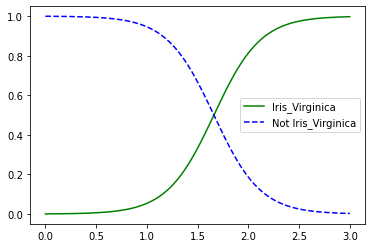

In [25]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1],"g-",label="Iris_Virginica")
plt.plot(X_new,y_prob[:,0],"b--",label="Not Iris_Virginica")
plt.legend()

In [27]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### softmax Regression

In [28]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [29]:
softmax_reg.predict([[5,2]])

array([2])

In [30]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])